In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#First we generate the piano roll from y_test_pred, that has been predicted by the model
arr = np.load('/content/drive/MyDrive/Post-Processing/MEL2.npy')
print(np.shape(arr))

(2953, 100, 88)


In [ ]:
#backtracking to convert 3D array to 2D
X=[]
i=0
for i in range(2953):
  if i==0:
    X=arr[0]
  else:
    X=np.concatenate((X, arr[i]), axis=0)
print(X.shape)

(295300, 88)


In [ ]:
#converting boolean to binary matrix with entries 0 and 1
arr2 = np.empty((295300, 88), dtype = int) 
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i,j]==False:
            arr2[i,j]=int(0)
            int(arr2[i,j])
        elif X[i,j]==True:
            arr2[i,j]=int(1)

         
print(arr2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
!pip install midiutil

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54566 sha256=b7cd97cd01e3dc4ab9ca785948c11cba4ea3be7b57e2de3dbcda75d7a16036d5
  Stored in directory: /root/.cache/pip/wheels/e3/97/cd/a677b61a76d575f373e2e10302f1d9106507fea6dd1320df03
Successfully built midiutil


In [ ]:
from midiutil.MidiFile import MIDIFile

mf = MIDIFile(1)
track = 0   
time = 0
delta = 0.000005
mf.addTrackName(track, time, "Output")
mf.addTempo(track, time, 120)

channel = 0
volume = 100
duration = 0.01 

for i in range(10000):   
    time=time + i*delta
    for j in range(arr2.shape[1]):
        if X[i][j] == 1:
            pitch = j
            mf.addNote(track, channel, pitch, time, duration, volume)

In [ ]:
#generate the MIDI file for y_test_pred
with open("output_final.mid", 'wb') as outf:
    mf.writeFile(outf)

In [ ]:
!pip install pretty_midi

     |████████████████████████████████| 5.6 MB 5.2 MB/s 
     |████████████████████████████████| 51 kB 5.5 MB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591955 sha256=903aaa48b71896ec6d13b0da63e3c0bd5fb3e9f92e5cb582cdd85fe83ce7c7d5
  Stored in directory: /root/.cache/pip/wheels/ad/74/7c/a06473ca8dcb63efb98c1e67667ce39d52100f837835ea18fa
Successfully built pretty-midi


In [ ]:
import pretty_midi
import pandas as pd
path = "output_final.mid"
midi_data = pretty_midi.PrettyMIDI(path)
midi_list = []

pretty_midi.pretty_midi.MAX_TICK = 1e10
midi_data.tick_to_time(14325216)

for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = note.start
        end = note.end
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, end, pitch, velocity, instrument.name])
        
midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])

print(df)

          Start         End  Pitch  Velocity Instrument
0        0.0000    0.000521     30       100     Output
1        0.0000    0.000521     34       100     Output
2        0.0000    0.003125     35       100     Output
3        0.0000    0.000521     37       100     Output
4        0.0000    0.000521     46       100     Output
...         ...         ...    ...       ...        ...
48101  124.9625  124.967187     49       100     Output
48102  124.9875  124.992188     23       100     Output
48103  124.9875  124.992188     35       100     Output
48104  124.9875  124.992188     44       100     Output
48105  124.9875  124.992188     47       100     Output

[48106 rows x 5 columns]


From Model


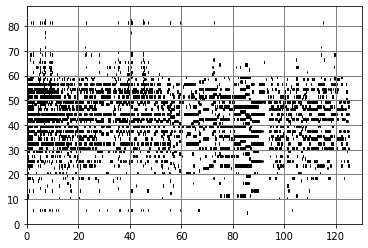

In [ ]:
fig, ax = plt.subplots()

i = 0
while(i<48105) :
    start = float(midi_list[i][0])
    pitch = float(midi_list[i][2])
    duration = float(midi_list[i][1]-midi_list[i][0])
    rect = matplotlib.patches.Rectangle((start, pitch),duration, 1, ec='black', linewidth=1)
    ax.add_patch(rect)
    i+=1
  

plt.xlim([0, 130])
plt.ylim([0, 88])

plt.grid(color='grey',linewidth=1)

print('From Model')
plt.show()

In [ ]:
arr3 = np.load('/content/drive/MyDrive/MEL-val/Y_final_MEL_val.npy')
arr3=np.squeeze(arr3, axis=-2)
print(np.shape(arr3))

(2953, 100, 88)


In [ ]:
#backtracking to convert 3D array to 2D
X2=[]
i=0
for i in range(2953):
  if i==0:
    X2=arr3[0]
  else:
    X2=np.concatenate((X2, arr3[i]), axis=0)
print(X2.shape)

(295300, 88)


In [ ]:
#converting boolean to binary matrix with entries 0 and 1
arr4 = np.empty((295300, 88), dtype = int) 
for i in range(X2.shape[0]):
    for j in range(X2.shape[1]):
        if X2[i,j]==False:
            arr4[i,j]=int(0)
            int(arr4[i,j])
        elif X2[i,j]==True:
            arr4[i,j]=int(1)

         
print(arr4)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from midiutil.MidiFile import MIDIFile

mf = MIDIFile(1)
track = 0   
time = 0
delta = 0.000005
mf.addTrackName(track, time, "Output")
mf.addTempo(track, time, 120)

channel = 0
volume = 100
duration = 0.01 

for i in range(10000):   
    time=time + i*delta
    for j in range(arr4.shape[1]):
        if X2[i][j] == 1:
            pitch = j
            mf.addNote(track, channel, pitch, time, duration, volume)

In [ ]:
#generate the MIDI file for y_test_pred
with open("output_final_actual.mid", 'wb') as outf:
    mf.writeFile(outf)

In [ ]:
import pretty_midi
import pandas as pd
path = "output_final_actual.mid"
midi_data = pretty_midi.PrettyMIDI(path)
midi_list = []

pretty_midi.pretty_midi.MAX_TICK = 1e10
midi_data.tick_to_time(14325216)

for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = note.start
        end = note.end
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, end, pitch, velocity, instrument.name])
        
midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])

print(df)

            Start         End  Pitch  Velocity Instrument
0        0.000000    0.000521     30       100     Output
1        0.000000    0.000521     46       100     Output
2        0.000000    0.000521     49       100     Output
3        0.000521    0.001042     30       100     Output
4        0.000521    0.001042     46       100     Output
...           ...         ...    ...       ...        ...
30250  124.887500  124.892187     35       100     Output
30251  124.912500  124.917187     35       100     Output
30252  124.937500  124.942188     35       100     Output
30253  124.962500  124.967187     35       100     Output
30254  124.987500  124.992188     35       100     Output

[30255 rows x 5 columns]


Actual


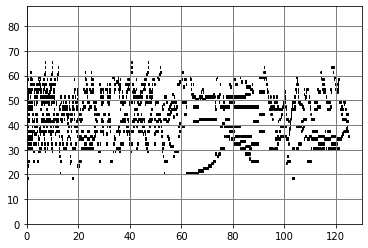

In [ ]:
fig, ax = plt.subplots()

i = 0
while(i<30255) :
    start = float(midi_list[i][0])
    pitch = float(midi_list[i][2])
    duration = float(midi_list[i][1]-midi_list[i][0])
    rect = matplotlib.patches.Rectangle((start, pitch),duration, 1, ec='black', linewidth=1)
    ax.add_patch(rect)
    i+=1
  

plt.xlim([0, 130])
plt.ylim([0, 88])

plt.grid(color='grey',linewidth=1)

print('Actual')
plt.show()